<a href="https://colab.research.google.com/github/mossytreesandferns/DataCampHomework/blob/master/DCImportingIntermediate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Mount my drive- run the code, go to the link, accept.
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
#Change working directory to make it easier to access the files
import os
os.chdir("/content/gdrive/My Drive/DCImportingData/")
os.getcwd()

'/content/gdrive/My Drive/DCImportingData'

# Importing Data From the Internet

### Importing Flat Files from the Web

In [0]:
from urllib.request import urlretrieve
import pandas as pd

In [4]:
'''CSV Files'''
url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'
urlretrieve(url,'winequality-red1.csv')


('winequality-red1.csv', <http.client.HTTPMessage at 0x7fa6fdd602e8>)

In [5]:
data = pd.read_csv('winequality-red1.csv',sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


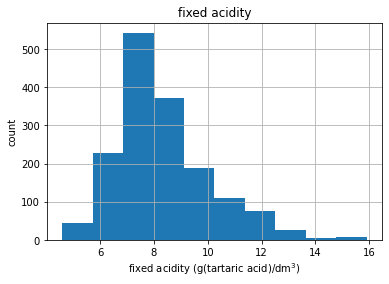

In [7]:
import matplotlib.pyplot as plt
pd.DataFrame.hist(data.iloc[:, 0:1]) #df.ix[] is label and integer based slicing command that has been deprecated, use iloc
plt.xlabel('fixed acidity (g(tartaric acid)/dm$^3$)')
plt.ylabel('count')
plt.show()

In [8]:
pd.__version__

'1.0.3'

In [9]:
'''XLS files'''
url = 'http://s3.amazonaws.com/assets.datacamp.com/course/importing_data_into_r/latitude.xls'
urlretrieve(url,'latitude.xls')

('latitude.xls', <http.client.HTTPMessage at 0x7fa6fd2da3c8>)

In [10]:
data = pd.read_excel('latitude.xls',sheet_name=None)
data.keys()

dict_keys(['1700', '1900'])

In [11]:
data1 = data['1700']
data1.head()

,country,1700
0,Afghanistan,34.565000
1,Akrotiri and Dhekelia,34.616667
2,Albania,41.312000
3,Algeria,36.720000
4,American Samoa,-14.307000


### HTTP requests from the Web

In [0]:
# http protocol identifier
# website.com resource name
# GET request- what you send every time you go to a website

In [0]:
'''Extracting HTML using urllib'''
from urllib.request import urlopen, Request
url = 'https://www.wikipedia.org'
request = Request(url)
response = urlopen(request)
html = response.read()
response.close()

In [16]:
html

b'<!DOCTYPE html>\n<html lang="mul" class="no-js">\n<head>\n<meta charset="utf-8">\n<title>Wikipedia</title>\n<meta name="description" content="Wikipedia is a free online encyclopedia, created and edited by volunteers around the world and hosted by the Wikimedia Foundation.">\n<![if gt IE 7]>\n<script>\ndocument.documentElement.className = document.documentElement.className.replace( /(^|\\s)no-js(\\s|$)/, "$1js-enabled$2" );\n</script>\n<![endif]>\n<!--[if lt IE 7]><meta http-equiv="imagetoolbar" content="no"><![endif]-->\n<meta name="viewport" content="initial-scale=1,user-scalable=yes">\n<link rel="apple-touch-icon" href="/static/apple-touch/wikipedia.png">\n<link rel="shortcut icon" href="/static/favicon/wikipedia.ico">\n<link rel="license" href="//creativecommons.org/licenses/by-sa/3.0/">\n<style>\n.sprite{background-image:url(portal/wikipedia.org/assets/img/sprite-81a290a5.png);background-image:linear-gradient(transparent,transparent),url(portal/wikipedia.org/assets/img/sprite-81a

In [17]:
'''Extracting HTML using requests'''
import requests
url = 'https://www.wikipedia.org'
r = requests.get(url)
text = r.text
text

'<!DOCTYPE html>\n<html lang="mul" class="no-js">\n<head>\n<meta charset="utf-8">\n<title>Wikipedia</title>\n<meta name="description" content="Wikipedia is a free online encyclopedia, created and edited by volunteers around the world and hosted by the Wikimedia Foundation.">\n<![if gt IE 7]>\n<script>\ndocument.documentElement.className = document.documentElement.className.replace( /(^|\\s)no-js(\\s|$)/, "$1js-enabled$2" );\n</script>\n<![endif]>\n<!--[if lt IE 7]><meta http-equiv="imagetoolbar" content="no"><![endif]-->\n<meta name="viewport" content="initial-scale=1,user-scalable=yes">\n<link rel="apple-touch-icon" href="/static/apple-touch/wikipedia.png">\n<link rel="shortcut icon" href="/static/favicon/wikipedia.ico">\n<link rel="license" href="//creativecommons.org/licenses/by-sa/3.0/">\n<style>\n.sprite{background-image:url(portal/wikipedia.org/assets/img/sprite-81a290a5.png);background-image:linear-gradient(transparent,transparent),url(portal/wikipedia.org/assets/img/sprite-81a2

In [18]:
import requests
url = "http://www.datacamp.com/teach/documentation"
r = requests.get(url)
text = r.text
text

'<!doctype html>\n<html lang="en" data-direction="ltr">\n  <head>\n    <link href="https://fonts.intercomcdn.com" rel="preconnect" crossorigin>\n      <script src="https://www.googletagmanager.com/gtag/js?id=UA-39297847-9" async="async" nonce="iF5VzYlhsPXMz/RoEdXIdJiPzqwh0q4ARiOyFCoCJuo="></script>\n      <script nonce="iF5VzYlhsPXMz/RoEdXIdJiPzqwh0q4ARiOyFCoCJuo=">\n        window.dataLayer = window.dataLayer || [];\n        function gtag(){dataLayer.push(arguments);}\n        gtag(\'js\', new Date());\n        gtag(\'config\', \'UA-39297847-9\');\n</script>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <title>DataCamp Help Center</title>\n    <meta name="description" content="">\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n\n      <link rel="alternate" href="http://instructor-support.datacamp.com/en/" hreflang="en">\n\n      <meta name="intercom:trackingEvent" content="{&quot;name&quot;:&quot;Viewed Help Cent

### Scraping the Web in Python

In [19]:
'''Using Beautiful Soup and requests'''
from bs4 import BeautifulSoup
import requests

url = 'https://www.crummy.com/software/BeautifulSoup'
r = requests.get(url)
html_doc = r.text
soup = BeautifulSoup(html_doc)
soup

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN" "http://www.w3.org/TR/REC-html40/transitional.dtd">
<html>
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>Beautiful Soup: We called him Tortoise because he taught us.</title>
<link href="mailto:leonardr@segfault.org" rev="made"/>
<link href="/nb/themes/Default/nb.css" rel="stylesheet" type="text/css"/>
<meta content="Beautiful Soup: a library designed for screen-scraping HTML and XML." name="Description"/>
<meta content="Markov Approximation 1.4 (module: leonardr)" name="generator"/>
<meta content="Leonard Richardson" name="author"/>
</head>
<body alink="red" bgcolor="white" link="blue" text="black" vlink="660066">
<style>
#tidelift { }

#tidelift a {
 border: 1px solid #666666;
 margin-left: auto;
 padding: 10px;
 text-decoration: none;
}

#tidelift .cta {
 background: url("tidelift.svg") no-repeat;
 padding-left: 30px;
}
</style>
<img align="right" src="10.1.jpg" width="250"/><br/>
<p>[ 

In [20]:
soup.prettify

<bound method Tag.prettify of <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN" "http://www.w3.org/TR/REC-html40/transitional.dtd">
<html>
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>Beautiful Soup: We called him Tortoise because he taught us.</title>
<link href="mailto:leonardr@segfault.org" rev="made"/>
<link href="/nb/themes/Default/nb.css" rel="stylesheet" type="text/css"/>
<meta content="Beautiful Soup: a library designed for screen-scraping HTML and XML." name="Description"/>
<meta content="Markov Approximation 1.4 (module: leonardr)" name="generator"/>
<meta content="Leonard Richardson" name="author"/>
</head>
<body alink="red" bgcolor="white" link="blue" text="black" vlink="660066">
<style>
#tidelift { }

#tidelift a {
 border: 1px solid #666666;
 margin-left: auto;
 padding: 10px;
 text-decoration: none;
}

#tidelift .cta {
 background: url("tidelift.svg") no-repeat;
 padding-left: 30px;
}
</style>
<img align="right" src="10.1

In [25]:
print(soup.title)

<title>Beautiful Soup: We called him Tortoise because he taught us.</title>


In [24]:
print(soup.get_text()) #not using print in this case leaves tags in the text




Beautiful Soup: We called him Tortoise because he taught us.








#tidelift { }

#tidelift a {
 border: 1px solid #666666;
 margin-left: auto;
 padding: 10px;
 text-decoration: none;
}

#tidelift .cta {
 background: url("tidelift.svg") no-repeat;
 padding-left: 30px;
}


[ Download | Documentation | Hall of Fame | For enterprise | Source | Changelog | Discussion group  | Zine ]

Beautiful Soup

You didn't write that awful page. You're just trying to get some
data out of it. Beautiful Soup is here to help. Since 2004, it's been
saving programmers hours or days of work on quick-turnaround
screen scraping projects.
Beautiful Soup is a Python library designed for quick turnaround
projects like screen-scraping. Three features make it powerful:


Beautiful Soup provides a few simple methods and Pythonic idioms
for navigating, searching, and modifying a parse tree: a toolkit for
dissecting a document and extracting what you need. It doesn't take
much code to write an application

Beauti

In [26]:
for link in soup.find_all('a'):
  print(link.get('href'))

#Download
bs4/doc/
#HallOfFame
enterprise.html
https://code.launchpad.net/beautifulsoup
https://bazaar.launchpad.net/%7Eleonardr/beautifulsoup/bs4/view/head:/CHANGELOG
https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup
zine/
bs4/download/
http://lxml.de/
http://code.google.com/p/html5lib/
bs4/doc/
https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=enterprise
https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup
https://bugs.launchpad.net/beautifulsoup/
https://tidelift.com/security
https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=website
zine/
None
bs4/download/
http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html
download/3.x/BeautifulSoup-3.2.2.tar.gz
https://tidelift.com/subscription/pkg/pypi-beautifulsoup?utm_source=pypi-beautifulsoup&utm_medium=referral&utm_campaign=website
None
http://www.nytimes.co

# Interacting with API's

### Intro to API's and JSON

In [0]:
# JSON format most common to get from api's, dictionaries, keys always strings

In [0]:
'''Importing local JSON file'''
import json
with open('features.json','r') as json_file:
  json_data = json.load(json_file)

In [30]:
type(json_data)

dict

In [31]:
json_data

{'discoverEEV1': {'description': '', 'ratio': 1},
 'dockerCloudFederationV1': {'description': '', 'ratio': 1},
 'passthroughHTTPProxy': {'description': '', 'ratio': 1},
 'releaseNotesV1': {'description': '', 'ratio': 1},
 'settingsV0': {'force-disable': True, 'ratio': 0},
 'swarmFederation': {'description': '', 'force-disable': True, 'ratio': 1}}

In [32]:
for key, value in json_data.items():
  print(key, value)

passthroughHTTPProxy {'ratio': 1, 'description': ''}
releaseNotesV1 {'ratio': 1, 'description': ''}
swarmFederation {'force-disable': True, 'ratio': 1, 'description': ''}
dockerCloudFederationV1 {'ratio': 1, 'description': ''}
discoverEEV1 {'ratio': 1, 'description': ''}
settingsV0 {'force-disable': True, 'ratio': 0}


In [35]:
# printing values without referencing them in the for loop
for key in json_data.keys():
  print(key + ': ', json_data.values())

passthroughHTTPProxy:  dict_values([{'ratio': 1, 'description': ''}, {'ratio': 1, 'description': ''}, {'force-disable': True, 'ratio': 1, 'description': ''}, {'ratio': 1, 'description': ''}, {'ratio': 1, 'description': ''}, {'force-disable': True, 'ratio': 0}])
releaseNotesV1:  dict_values([{'ratio': 1, 'description': ''}, {'ratio': 1, 'description': ''}, {'force-disable': True, 'ratio': 1, 'description': ''}, {'ratio': 1, 'description': ''}, {'ratio': 1, 'description': ''}, {'force-disable': True, 'ratio': 0}])
swarmFederation:  dict_values([{'ratio': 1, 'description': ''}, {'ratio': 1, 'description': ''}, {'force-disable': True, 'ratio': 1, 'description': ''}, {'ratio': 1, 'description': ''}, {'ratio': 1, 'description': ''}, {'force-disable': True, 'ratio': 0}])
dockerCloudFederationV1:  dict_values([{'ratio': 1, 'description': ''}, {'ratio': 1, 'description': ''}, {'force-disable': True, 'ratio': 1, 'description': ''}, {'ratio': 1, 'description': ''}, {'ratio': 1, 'description': ''}

### APIs and the web

In [0]:
# api: code that allows software programs to interact with each other

In [39]:
import requests
url = 'https://www.omdbapi.com/?t=hackers' #send all data requests to: http://www.omdbapi.com/?apikey=[yourkey]&
r = requests.get(url)           #? is the query string, question being asked of the api, i.e. asking about the movie 'Hackers'
json_data = r.json()
for k, v in json_data.items():
  print(k, v)

Response False
Error No API key provided.


In [47]:
import requests
url='http://www.omdbapi.com/?i=tt3896198&apikey=4f075074'
#url = 'https://www.omdbapi.com/?apikey=4f075074' didn't work 
r = requests.get(url)
json_data = r.json()
for k, v in json_data.items():
  print(k, v)

Title Guardians of the Galaxy Vol. 2
Year 2017
Rated PG-13
Released 05 May 2017
Runtime 136 min
Genre Action, Adventure, Comedy, Sci-Fi
Director James Gunn
Writer James Gunn, Dan Abnett (based on the Marvel comics by), Andy Lanning (based on the Marvel comics by), Steve Englehart (Star-Lord created by), Steve Gan (Star-Lord created by), Jim Starlin (Gamora and Drax created by), Stan Lee (Groot created by), Larry Lieber (Groot created by), Jack Kirby (Groot created by), Bill Mantlo (Rocket Raccoon created by), Keith Giffen (Rocket Raccoon created by), Steve Gerber (Howard the Duck created by), Val Mayerik (Howard the Duck created by)
Actors Chris Pratt, Zoe Saldana, Dave Bautista, Vin Diesel
Plot The Guardians struggle to keep together as a team while dealing with their personal family issues, notably Star-Lord's encounter with his father the ambitious celestial being Ego.
Language English
Country USA
Awards Nominated for 1 Oscar. Another 14 wins & 52 nominations.
Poster https://m.media

In [49]:
# Tacking on api key to the url
url = 'https://www.omdbapi.com/?t=hackers&apikey=4f075074' 
r = requests.get(url)           
json_data = r.json()
for k, v in json_data.items():
  print(k, v)

Title Hackers
Year 1995
Rated PG-13
Released 15 Sep 1995
Runtime 105 min
Genre Comedy, Crime, Drama, Thriller
Director Iain Softley
Writer Rafael Moreu
Actors Jonny Lee Miller, Angelina Jolie, Jesse Bradford, Matthew Lillard
Plot Hackers are blamed for making a virus that will capsize five oil tankers.
Language English, Italian, Japanese, Russian
Country USA
Awards N/A
Poster https://m.media-amazon.com/images/M/MV5BNmExMTkyYjItZTg0YS00NWYzLTkwMjItZWJiOWQ2M2ZkYjE4XkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_SX300.jpg
Ratings [{'Source': 'Internet Movie Database', 'Value': '6.3/10'}, {'Source': 'Rotten Tomatoes', 'Value': '33%'}, {'Source': 'Metacritic', 'Value': '46/100'}]
Metascore 46
imdbRating 6.3
imdbVotes 63,220
imdbID tt0113243
Type movie
DVD 24 Apr 2001
BoxOffice N/A
Production MGM
Website N/A
Response True


In [50]:
url = 'https://en.wikipedia.org/w/api.php?action=query&prop=extracts&format=json&exintro=&titles=pizza' 
r = requests.get(url)           
json_data = r.json()
for k, v in json_data.items():
  print(k, v)

batchcomplete 
warnings {'extracts': {'*': 'HTML may be malformed and/or unbalanced and may omit inline images. Use at your own risk. Known problems are listed at https://www.mediawiki.org/wiki/Extension:TextExtracts#Caveats.'}}
query {'normalized': [{'from': 'pizza', 'to': 'Pizza'}], 'pages': {'24768': {'pageid': 24768, 'ns': 0, 'title': 'Pizza', 'extract': '<p class="mw-empty-elt">\n</p>\n\n<p><b>Pizza</b> (<small>Italian:\xa0</small><span title="Representation in the International Phonetic Alphabet (IPA)">[ˈpittsa]</span>, <small>Neapolitan:\xa0</small><span title="Representation in the International Phonetic Alphabet (IPA)">[ˈpittsə]</span>) is a savory dish of Italian origin, consisting of a usually round, flattened base of leavened wheat-based dough topped with tomatoes, cheese, and often various other ingredients (anchovies, olives, meat, etc.) baked at a high temperature, traditionally in a wood-fired oven. A small pizza is sometimes called a pizzetta.\n</p><p>In Italy, pizza s

In [52]:
pizza_extract = json_data['query']['pages']['24768']['extract']
print(pizza_extract)

<p class="mw-empty-elt">
</p>

<p><b>Pizza</b> (<small>Italian: </small><span title="Representation in the International Phonetic Alphabet (IPA)">[ˈpittsa]</span>, <small>Neapolitan: </small><span title="Representation in the International Phonetic Alphabet (IPA)">[ˈpittsə]</span>) is a savory dish of Italian origin, consisting of a usually round, flattened base of leavened wheat-based dough topped with tomatoes, cheese, and often various other ingredients (anchovies, olives, meat, etc.) baked at a high temperature, traditionally in a wood-fired oven. A small pizza is sometimes called a pizzetta.
</p><p>In Italy, pizza served in formal settings, such as at a restaurant, is presented unsliced and eaten with the use of a knife and fork. In casual settings it is cut into wedges to be eaten while held in the hand.
</p><p>The term <i>pizza</i> was first recorded in the 10th century in a Latin manuscript from the Southern Italian town of Gaeta in Lazio, on the border with Campania. Modern pi

# Diving in Twitter API

### Twitter api authentification: See TwitterAnalysis.ipynb